## Multiple Linear Regression (MLR)

### Short Theory
**Multiple Linear Regression (MLR)** is used to predict a **continuous dependent variable** \(y\) using **two or more independent variables** \(x_1, x_2, \dots, x_n\).  
It assumes that the relationship between the dependent variable and all features is **linear**.

---

### Model Equation
$$
y = b_0 + b_1x_1 + b_2x_2 + \cdots + b_nx_n + \epsilon
$$

### Prediction Equation
$$
\hat{y} = b_0 + b_1x_1 + b_2x_2 + \cdots + b_nx_n
$$

Where:
- \(y\) = actual output
- \(\hat{y}\) = predicted output
- \(b_0\) = intercept
- \(b_1, b_2, \dots, b_n\) = coefficients
- \(\epsilon\) = error term

---

### Key Assumptions (Important)
- **Linearity:** target and features have a linear relationship  
- **No multicollinearity:** independent variables should not be highly correlated  
- **Homoscedasticity:** residuals have constant variance (errors spread evenly)


In [15]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:

x, y = make_regression(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_targets=1,
    noise=50,
    random_state=42
)
# This generates a dataset of hundred rows with two input and one output column


In [17]:
df = pd.DataFrame({'feature1':x[:,0],'feature2':x[:,1],'target':y})

In [18]:

df.head()

,feature1,feature2,target
0,-1.191303,0.656554,-22.779796
1,0.058209,-1.142970,-107.569629
2,0.586857,2.190456,201.122932
3,0.473238,-0.072829,1.480178
4,0.738467,0.171368,111.798503


In [19]:
df.shape

(100, 3)

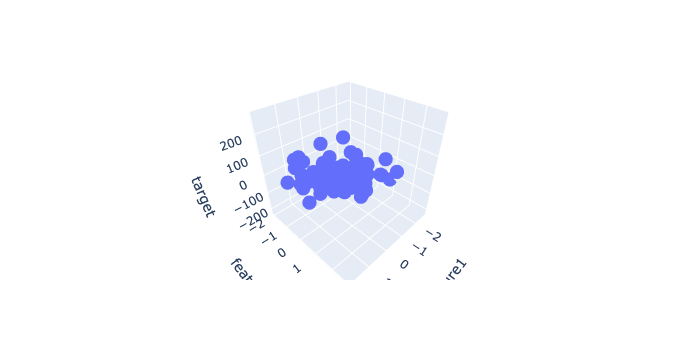

In [20]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()
     


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.2,random_state = 3)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = lr.predict(x_test)

In [27]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2_Score",r2_score(y_test,y_pred))


MAE 47.0876578106196
MSE 3639.6081061143377
R2_Score 0.655121125764055


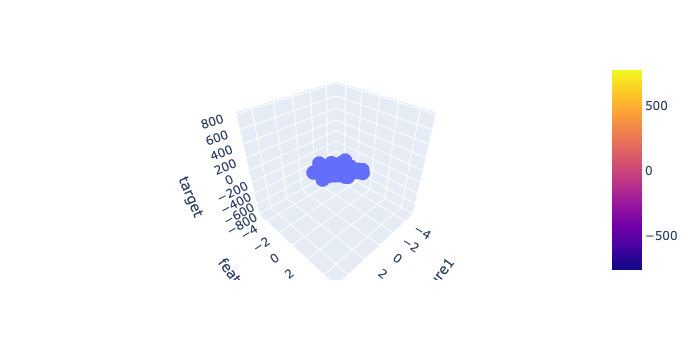

In [33]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

xGrid, yGrid = np.meshgrid(x, y)

# CREATE final FIRST
final = np.vstack((
    xGrid.ravel(),
    yGrid.ravel()
)).T   # shape (100, 2)

# THEN predict
z_final = lr.predict(final).reshape(10, 10)
z = z_final

# Plot
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.add_trace(go.Surface(x=x, y=y, z=z))
fig.show()


In [34]:
lr.coef_

array([81.05675748, 72.39437821])

In [35]:
lr.intercept_

np.float64(5.3638090720905645)